In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 500)

In [4]:
data = pd.read_csv('treated_data2.csv')

In [5]:
data.head()

,Unnamed: 0,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
0,0,48.150777,6.489743,6.891947,16.710984,10.066241,11.690308,122.9,56.18,2.20,7.63,25.2,4.212190,4.811371,3.226844
1,1,37.286173,9.935769,13.730608,15.506720,10.540729,13.000000,99.2,50.63,1.92,12.77,21.2,2.883453,4.597138,3.054001
2,2,44.184088,6.097359,17.529325,13.511824,6.000000,12.677404,120.2,56.28,2.12,10.54,20.8,3.228502,4.789157,3.034953
3,3,41.325000,6.000000,22.000000,5.000000,12.675000,13.000000,67.8,48.72,2.17,22.42,19.3,1.966387,4.216562,2.960105
4,4,47.279148,7.907705,11.352851,19.460296,6.000000,8.000000,131.7,63.89,2.04,9.47,15.6,4.602754,4.880527,2.747271


In [6]:
data.drop(columns='Unnamed: 0', axis =1, inplace=True)

In [7]:
data.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
0,48.150777,6.489743,6.891947,16.710984,10.066241,11.690308,122.9,56.18,2.20,7.63,25.2,4.212190,4.811371,3.226844
1,37.286173,9.935769,13.730608,15.506720,10.540729,13.000000,99.2,50.63,1.92,12.77,21.2,2.883453,4.597138,3.054001
2,44.184088,6.097359,17.529325,13.511824,6.000000,12.677404,120.2,56.28,2.12,10.54,20.8,3.228502,4.789157,3.034953
3,41.325000,6.000000,22.000000,5.000000,12.675000,13.000000,67.8,48.72,2.17,22.42,19.3,1.966387,4.216562,2.960105
4,47.279148,7.907705,11.352851,19.460296,6.000000,8.000000,131.7,63.89,2.04,9.47,15.6,4.602754,4.880527,2.747271


In [8]:
data.describe()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,41.392278,8.127430,14.276939,19.933414,10.554970,5.715461,105.643865,53.924570,2.121194,8.609783,13.482203,3.236349,4.636638,2.528122
std,6.071671,5.677545,5.949483,6.091829,4.371528,5.755106,22.474842,6.336723,0.239883,4.046951,5.138215,0.700248,0.220824,0.387734
min,29.000000,0.000000,5.000000,5.000000,2.000000,0.000000,58.100000,39.630000,1.540000,2.420000,6.289300,1.893240,4.062166,1.838850
25%,36.552301,4.800000,10.000000,17.201090,7.230000,0.000000,88.900000,50.070000,1.950000,5.920000,8.529000,2.800256,4.487512,2.143472
50%,39.860577,7.350000,13.730608,20.664169,11.605969,8.000000,108.100000,53.820000,2.130000,7.920000,13.682042,3.007927,4.683057,2.616084
75%,47.279148,12.000000,18.000000,23.666670,14.064416,11.990000,120.800000,58.290000,2.270000,10.510000,16.415000,3.399697,4.794136,2.798196
max,52.000000,20.000000,29.000000,31.578643,17.000000,13.000000,163.400000,68.670000,2.910000,23.780000,28.100000,5.001224,5.096201,3.335770


In [9]:
data.corr()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
A,1.000000,-0.542439,-0.062624,-0.386352,-0.169719,0.082772,0.397865,0.277509,0.171885,-0.100986,0.169325,0.298667,0.386127,0.115538
B,-0.542439,1.000000,0.022826,0.011687,0.043575,-0.483317,-0.075879,0.224980,0.176723,-0.252744,-0.231460,-0.024213,-0.071165,-0.207477
C,-0.062624,0.022826,1.000000,-0.186888,-0.669904,-0.283469,0.283601,0.483073,0.529866,-0.266409,-0.469052,-0.288603,0.262593,-0.468406
D,-0.386352,0.011687,-0.186888,1.000000,-0.078848,-0.409355,0.216989,-0.072525,-0.182274,-0.324280,-0.507404,0.455150,0.215209,-0.507091
E,-0.169719,0.043575,-0.669904,-0.078848,1.000000,0.152408,-0.847753,-0.582966,-0.373463,0.423548,0.261792,-0.468332,-0.823467,0.290623
F,0.082772,-0.483317,-0.283469,-0.409355,0.152408,1.000000,-0.223736,-0.494452,-0.426866,0.652801,0.872767,-0.118898,-0.210840,0.882946
HDT_0.455©,0.397865,-0.075879,0.283601,0.216989,-0.847753,-0.223736,1.000000,0.562374,0.227366,-0.530347,-0.202402,0.752849,0.990305,-0.244031
UTS(Mpa),0.277509,0.224980,0.483073,-0.072525,-0.582966,-0.494452,0.562374,1.000000,0.494524,-0.451088,-0.425615,0.273968,0.576664,-0.455883
Modulus(Gpa),0.171885,0.176723,0.529866,-0.182274,-0.373463,-0.426866,0.227366,0.494524,1.000000,-0.404942,-0.411822,-0.030854,0.174575,-0.421111
EAB%,-0.100986,-0.252744,-0.266409,-0.324280,0.423548,0.652801,-0.530347,-0.451088,-0.404942,1.000000,0.586948,-0.368770,-0.525292,0.587064


<Axes: xlabel='R value', ylabel='Count'>

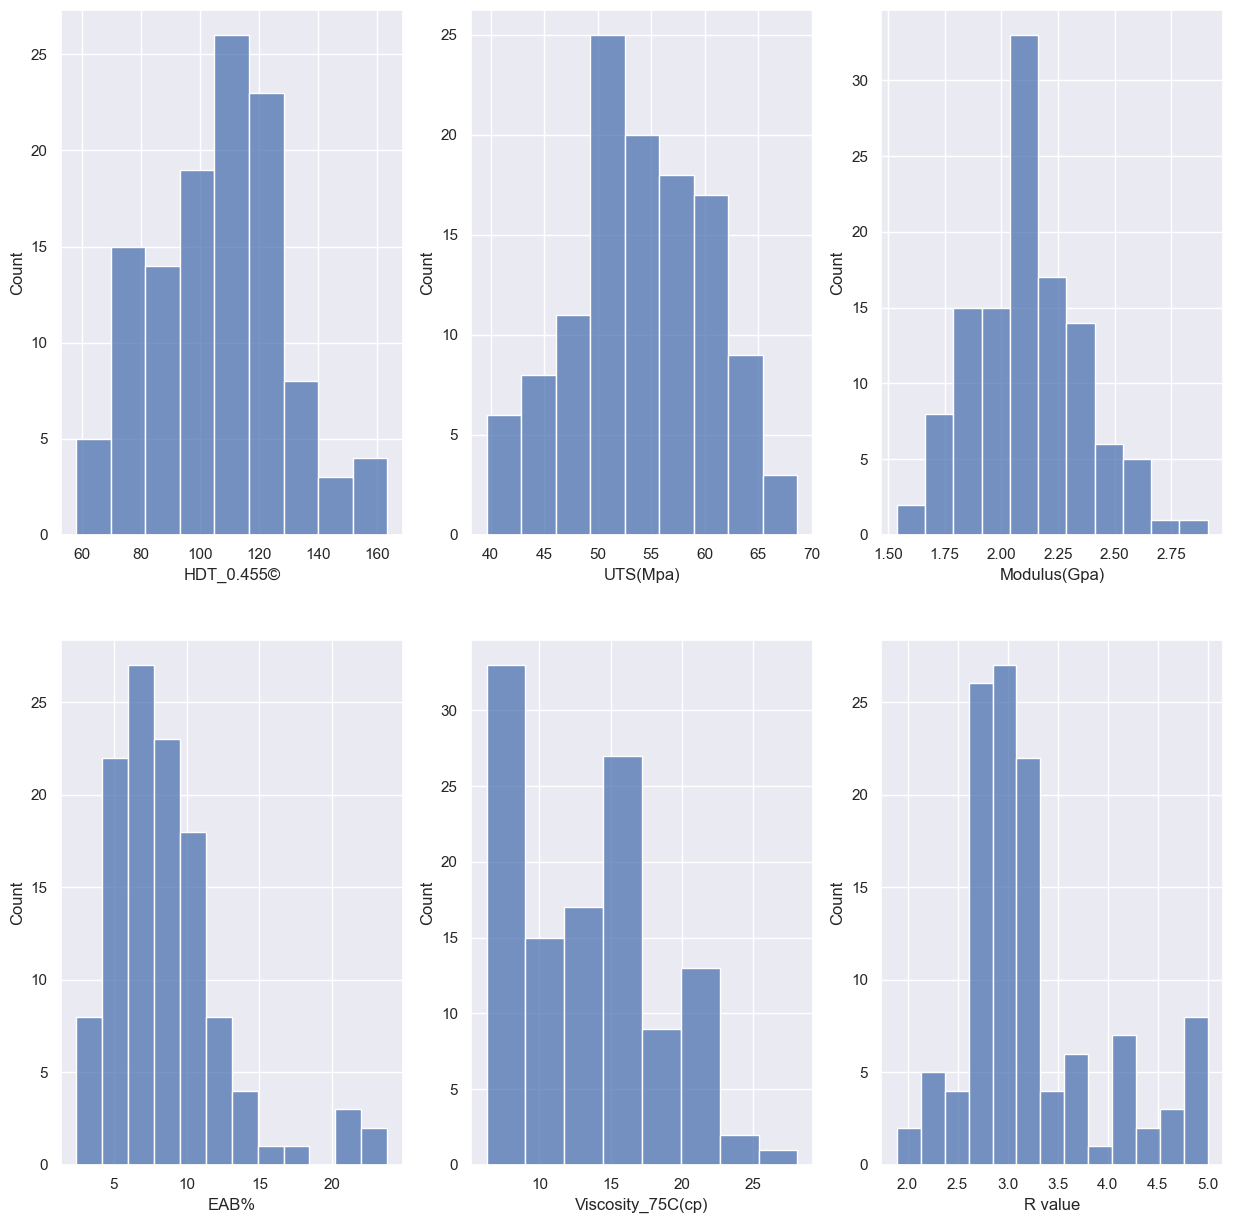

In [10]:
fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.histplot(data['HDT_0.455©'],ax=axes[0][0])
sns.histplot(data['UTS(Mpa)'],ax=axes[0][1])
sns.histplot(data['Modulus(Gpa)'],ax=axes[0][2])
sns.histplot(data['EAB%'],ax=axes[1][0])
sns.histplot(data['Viscosity_75C(cp)'],ax=axes[1][1])
sns.histplot(data['R value'],ax=axes[1][2])

In [11]:
# Let's transform 'HDT' with a log transformation
log_UTS = np.log(data['UTS(Mpa)'])
log_modulus = np.log(data['Modulus(Gpa)'])
log_eab = np.log(data['EAB%'])
log_r = np.log(data['R value'])

# Then we add it to our data frame
data['log_UTS'] = log_UTS
data['log_modulus'] = log_modulus
data['log_eab'] = log_eab
data['log_r'] = log_r


<Axes: xlabel='log_r', ylabel='Count'>

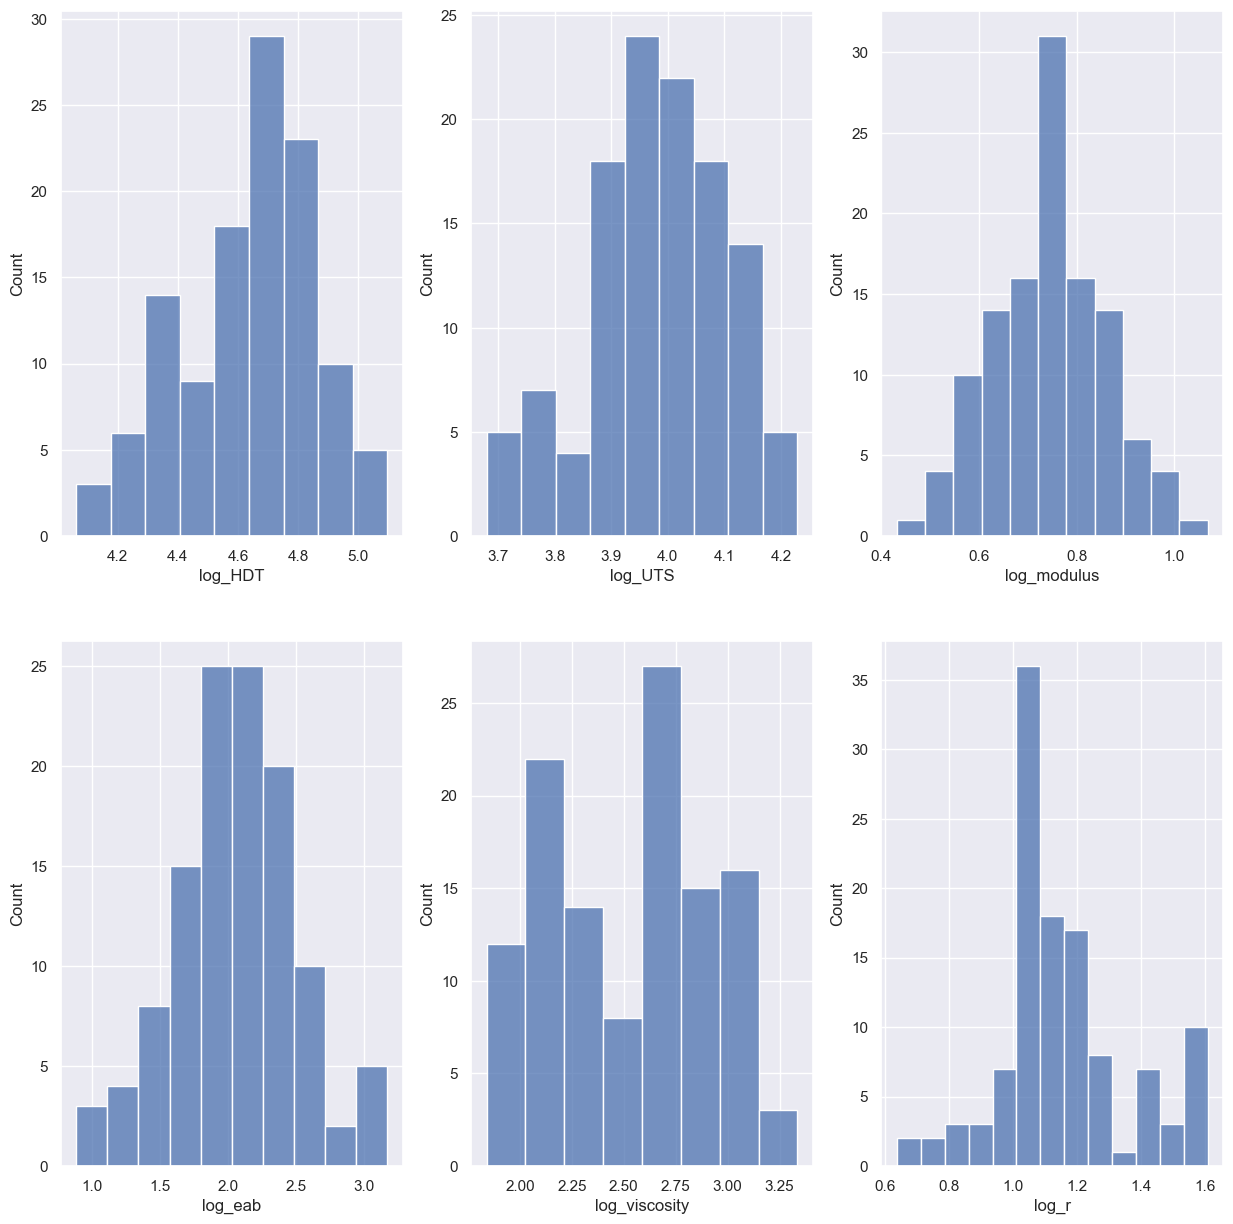

In [12]:
fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.histplot(data['log_HDT'],ax=axes[0][0])
sns.histplot(data['log_UTS'],ax=axes[0][1])
sns.histplot(data['log_modulus'],ax=axes[0][2])
sns.histplot(data['log_eab'],ax=axes[1][0])
sns.histplot(data['log_viscosity'],ax=axes[1][1])
sns.histplot(data['log_r'],ax=axes[1][2])

In [13]:
x = data[['A','B','C','D','E','F']]
y = data[['log_HDT','log_UTS','log_modulus','log_eab','log_viscosity','log_r']]


In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(x)
x_scaled = scaler.transform(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3, random_state=42)

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(x_train,y_train)

LinearRegression()

In [20]:
yhat = reg.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

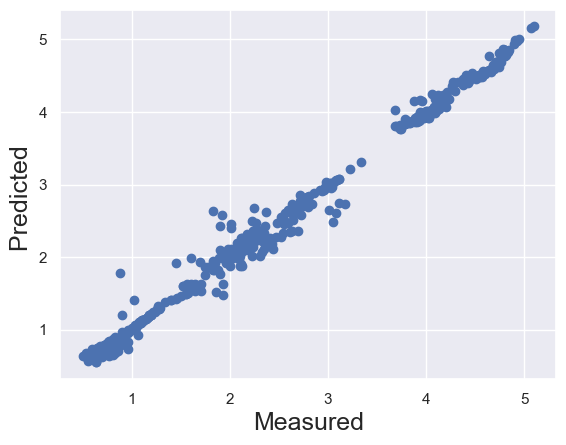

In [21]:
plt.scatter(y_train,yhat)
plt.xlabel('Measured', size=18)
plt.ylabel('Predicted ', size=18)
plt.show

C:\Users\apmle\AppData\Local\Temp\ipykernel_35708\3638381213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - yhat)


Text(0.5, 1.0, 'Residuals PDF')

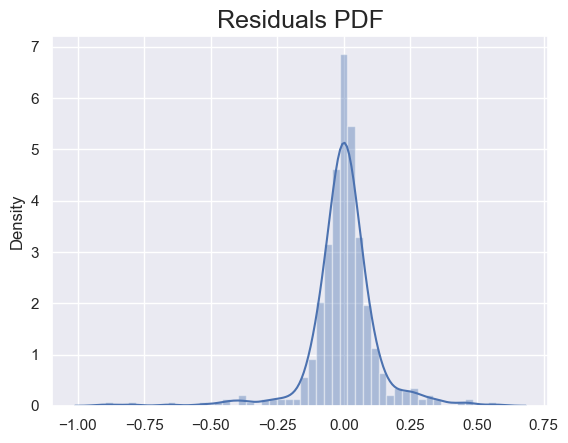

In [22]:
sns.distplot(y_train - yhat)
plt.title('Residuals PDF', size=18)

In [23]:
r2= reg.score(x_train,y_train)
r2

0.7753268802536621

In [24]:
reg.coef_

array([[ 11.38620584,  10.61062404,  10.99900715,  11.39290103,
          7.92390627,  10.70766995],
       [  2.7623295 ,   2.58493972,   2.68567956,   2.72960377,
          1.90780513,   2.54572122],
       [-16.2349467 , -15.19230241, -15.87813087, -16.33022401,
        -11.70976013, -15.4492745 ],
       [ 82.9351807 ,  77.61503963,  81.41338891,  83.24798594,
         60.00642454,  78.97291638],
       [-12.33419716, -11.47329088, -12.23538717, -12.48183145,
         -8.93271296, -11.39542789],
       [  0.56823285,   0.51392059,   0.31984083,   0.58064006,
          0.16640809,   0.47529263]])

In [25]:
reg.intercept_

array([4.63623946, 3.97558407, 0.74313134, 2.07613108, 2.52798771,
       1.15456121])

In [26]:
x.shape
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7630719828129529

In [27]:
y_hat_test = reg.predict(x_test)

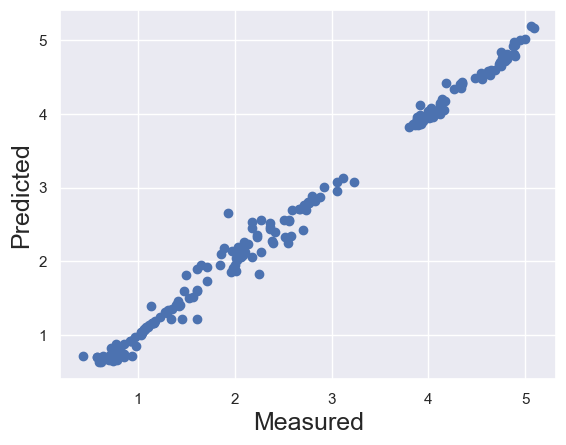

In [28]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Measured', size=18)
plt.ylabel('Predicted', size=18)
plt.show()

In [29]:
trial ={'A': [48.15077697,35.28617348,44.18408789], 'B': [6.489742611,12,10],'C': [6.89194729,13.73060825,17.52932487], 'D': [16.71098381,15.50672017,10],'E': [10.06624125,12.54072866,9.2866],'F': [11.69030807,10.93577,9] }



# A	B	C	D	E	F
# 48.15077697	6.489742611	6.89194729	16.71098381	10.06624125	11.69030807
# 35.28617348	12	13.73060825	15.50672017	12.54072866	10.93577
# 44.18408789	10	17.52932487	10	9.2866	9


In [30]:
df = pd.DataFrame(trial)

In [31]:
df

,A,B,C,D,E,F
0,48.150777,6.489743,6.891947,16.710984,10.066241,11.690308
1,35.286173,12.000000,13.730608,15.506720,12.540729,10.935770
2,44.184088,10.000000,17.529325,10.000000,9.286600,9.000000


In [32]:
x2=df

In [33]:
y_hat_test2 = reg.predict(df)

C:\Users\apmle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [34]:
y_hat_test2

array([[ 1092.88219133,   266.84810787, -1560.38169756,  7978.68054778,
        -1181.87612632,    50.98944066],
       [ 1077.89712339,   263.4348029 , -1541.4768891 ,  7884.83429028,
        -1168.57020674,    48.05237276],
       [ 1090.52095696,   266.87869228, -1557.92868801,  7970.25535243,
        -1181.9899465 ,    48.63661059]])

In [35]:
scaler2 = StandardScaler()

In [36]:
scaler2.fit(x2)
x_scaled2 = scaler.transform(x2)

In [37]:
yhat2 = reg.predict(x_scaled2)

In [38]:
results = pd.DataFrame(yhat2)

In [39]:
results

,0,1,2,3,4,5
0,4.801712,3.956732,0.671114,2.191818,3.068628,1.410607
1,4.445269,3.906098,0.699337,2.535651,2.907443,0.988349
2,4.618613,4.015059,0.796215,2.231695,2.826315,1.035856


In [40]:
true_data = np.exp(yhat2)
true_data

array([[121.71856695,  52.28619027,   1.95641573,   8.95146837,
         21.51236295,   4.09844417],
       [ 85.22276829,  49.70462784,   2.01241801,  12.62464735,
         18.30991443,   2.68679506],
       [101.3533314 ,  55.42655733,   2.21713236,   9.31564382,
         16.88313865,   2.81751648]])

In [41]:
results = pd.DataFrame(true_data)

In [42]:
results

,0,1,2,3,4,5
0,121.718567,52.286190,1.956416,8.951468,21.512363,4.098444
1,85.222768,49.704628,2.012418,12.624647,18.309914,2.686795
2,101.353331,55.426557,2.217132,9.315644,16.883139,2.817516


In [43]:
results.columns=['HDT','UTS','modulus','eab','viscosity','r']

In [44]:
results

,HDT,UTS,modulus,eab,viscosity,r
0,121.718567,52.286190,1.956416,8.951468,21.512363,4.098444
1,85.222768,49.704628,2.012418,12.624647,18.309914,2.686795
2,101.353331,55.426557,2.217132,9.315644,16.883139,2.817516


In [45]:
trial_final = pd.concat([df, results], axis=1)

In [46]:
trial_final

,A,B,C,D,E,F,HDT,UTS,modulus,eab,viscosity,r
0,48.150777,6.489743,6.891947,16.710984,10.066241,11.690308,121.718567,52.286190,1.956416,8.951468,21.512363,4.098444
1,35.286173,12.000000,13.730608,15.506720,12.540729,10.935770,85.222768,49.704628,2.012418,12.624647,18.309914,2.686795
2,44.184088,10.000000,17.529325,10.000000,9.286600,9.000000,101.353331,55.426557,2.217132,9.315644,16.883139,2.817516


In [47]:
trial_final.to_csv('To_test.csv')